# Druzabne igre

Projekt pri Programiranje 1

Analiziral bom 1000 najbolj priljubljenih družabnih igrer na spletnem portalu [BGG](https://boardgamegeek.com/browse/boardgame?)

In [1]:
# naložimo paket
import pandas as pd

# naložimo razpredelnice, s katerimi bomo delali
igre = pd.read_csv('igre.csv', index_col = 'id')
kategorije = pd.read_csv('kategorije.csv', index_col = 'id')
nacini = pd.read_csv('nacin_igranja.csv', index_col = 'id')

# ker bomo delali z velikimi razpredelnicami poskrbimo da se vedno izpiše le 20 vrstic
pd.options.display.max_rows = 20

In [2]:
#Pomozne funkcije
'''
po_imenu = igre['ime']
po_imenu

a = pd.merge(igre['ocena'], kategorije, on='id')
b = a.groupby('kategorija')
c = b.ocena.mean()
c.sort_values(ascending=False)

igre.groupby('maxplay').size().plot(kind='bar')
igre.groupby('minplay').size().plot(kind='bar')

Mogoce lahko za nacine igranja ugotovim povprečno trajanje igre. Povprečno starost igralca.
Potem laho grafe za 10 najbolj priljubljenih? Popularnost v odvisnosti od starosti?


'''

"\npo_imenu = igre['ime']\npo_imenu\n\na = pd.merge(igre['ocena'], kategorije, on='id')\nb = a.groupby('kategorija')\nc = b.ocena.mean()\nc.sort_values(ascending=False)\n\nigre.groupby('maxplay').size().plot(kind='bar')\nigre.groupby('minplay').size().plot(kind='bar')\n\nMogoce lahko za nacine igranja ugotovim povprečno trajanje igre. Povprečno starost igralca.\nPotem laho grafe za 10 najbolj priljubljenih? Popularnost v odvisnosti od starosti?\n\n\n"

## Uvod
Pri analizi bom v prvi vrsti uporabljal sledeče podatke: identifikacijska številka igre, ime igre, leto izida, stevilo glasov, povprečno oceno, omejitve glede starosti in števila igralcev ter čas igranja. Za natančnejšo obravnano trendov bom upošteval še tematske kategorije in načine igranja posameznih iger. Pa si kar oglejmo glavno tabelo (urejeno po številu glasov):

In [3]:
igre

,ime,leto,minplay,maxplay,mintime,maxtime,minage,ocena,glasovi
id,,,,,,,,,
13,Catan,1995,3,4,60,120,10,7.17910,88579
822,Carcassonne,2000,2,5,30,45,8,7.42312,88383
30549,Pandemic,2008,2,4,45,45,8,7.62693,87254
68448,7 Wonders,2010,2,7,30,30,10,7.77183,72419
36218,Dominion,2008,2,4,30,30,13,7.63710,70461
...,...,...,...,...,...,...,...,...,...
943,Ligretto,1988,2,4,10,10,8,6.18856,3006
156858,Black Orchestra,2016,1,5,90,90,14,7.53424,3009
31105,Archaeology: The Card Game,2007,2,4,20,20,8,6.67640,3002


Preden zares začnemo z analizo si dodefinirajmo nekatere uporabne stolpce.

In [4]:
igre['avgplay'] = (igre.minplay + igre.maxplay) / 2
igre['avgtime'] = (igre.mintime + igre.maxtime) / 2
igre

,ime,leto,minplay,maxplay,mintime,maxtime,minage,ocena,glasovi,avgplay,avgtime
id,,,,,,,,,,,
13,Catan,1995,3,4,60,120,10,7.17910,88579,3.5,90.0
822,Carcassonne,2000,2,5,30,45,8,7.42312,88383,3.5,37.5
30549,Pandemic,2008,2,4,45,45,8,7.62693,87254,3.0,45.0
68448,7 Wonders,2010,2,7,30,30,10,7.77183,72419,4.5,30.0
36218,Dominion,2008,2,4,30,30,13,7.63710,70461,3.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
943,Ligretto,1988,2,4,10,10,8,6.18856,3006,3.0,10.0
156858,Black Orchestra,2016,1,5,90,90,14,7.53424,3009,3.0,90.0
31105,Archaeology: The Card Game,2007,2,4,20,20,8,6.67640,3002,3.0,20.0


## Ocena v odvisnosti od leta in drugih dejavnikov
Ogeljmo si najprej kako leto izida vpliva na oceno. Da bodo rezultati bolj pregledni bomo ignorirali igre nastale pred letom 1980 saj te ne predstavljajo niti enega procenta podatkov.

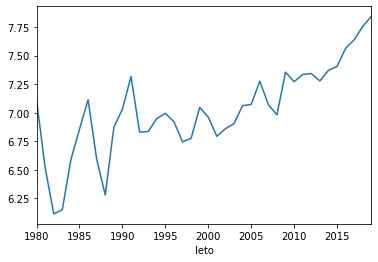

In [5]:
moderne_igre = igre[1980 <= igre.leto]
po_letih = moderne_igre.groupby('leto')
po_letih.ocena.mean().plot()

Opazimo da so ocene v osemdesetih kar poskakovale, na zacetku devetdesetih je prislo do velikega skoka, ki mu je sledil spust, od takrat naprej pa ocena v glavnem raste. Poglejmo še ali na oceno vpliva število igralcev.

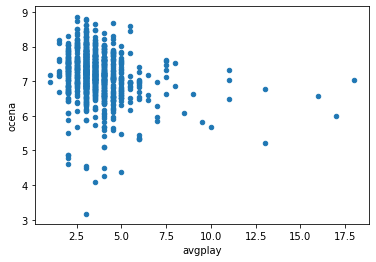

In [6]:
igre[igre.avgplay <=20].plot.scatter('avgplay', 'ocena')

Da je graf bolj pregleden zanemarimo igre z zelo velikim številom igralcev. Težko je opaziti kakšen poseben vpliv števila igralcev na oceno. Kako pa je s številom glasov?

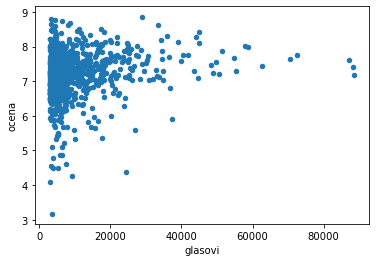

In [7]:
igre.plot.scatter('glasovi', 'ocena')

Opazimo, da imajo največkrat ocenjene igre dobre, vendar ne odlične ocene. Slabe igre imajo bolj malo glasov, verjetno zato ker jih nihče ne priporoči prijateljem. Za konec si poglejmo še povezavo med priporočeno starostjo igralcev in oceno.

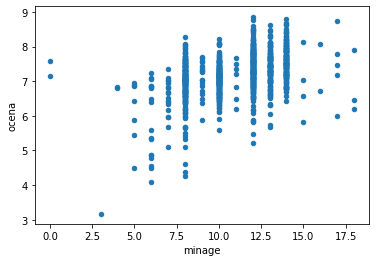

In [8]:
igre.plot.scatter('minage', 'ocena')

Zdi se da, ocena s starostjo lahno narašča. Igre za starejše so lahko bolj zapletene in tako tudi bolj zanimive. Verjetno zato nobena igra mlajše od 12 let nima ocene veliko nad 8. Dober indikator zahtevnosti igre je tudi povprečni igralnih čas. Poglejmo si še tega.

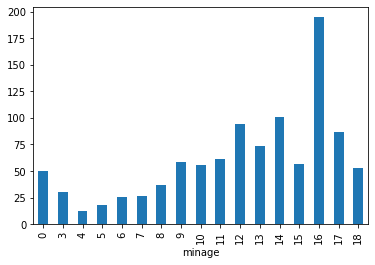

In [9]:
igre.groupby('minage')['avgtime'].mean().plot.bar()

Po pričakovanjih igralni čas raste s priporočeno starostjo igralcev, z velikima izjemama pri 0 in pri 17-18. To je morda zato, ker stran igram, ki nimajo predpisane starosti dodeli 0. Padec pri 17-18 pa morda zato ker tja spadajo tudi "igre za odrasle", pri katerih poudarek ravno ni na strateškem razmišljanju.

## Najbolj priljubljene teme in načini igranja
Portal BGG igre kategorizira na dva načina:
 + tematako: fantazijske, ekonomske, ...
 + po načinu igranja: igre s kartami, s kocko, ... 

Žal ta delitev ni najbolje definirana, meje niso povsem jasne in prihaja do pogostega prekrivanja. Vseeno si poglejmo najbolj popularne teme in nacine igranja.

In [10]:
#Za vsako temo, za vsako igro, ki ima to temo izracunamo koliko glasov ima, tako dobimo najbolj priljubljene teme na sploh
kategorije_po_glasovih = pd.merge(kategorije, igre['glasovi'], on='id').groupby('kategorija').glasovi.sum()
#Najbolj popularne kategorije
naj_kategorije = kategorije_po_glasovih.sort_values(ascending=False).head(20)
naj_kategorije

kategorija
Card Game             2855891
Fantasy               1865807
Economic              1659451
Fighting              1581733
Science Fiction       1148468
Medieval              1145100
City Building         1091206
Adventure              986000
Bluffing               920665
Territory Building     880090
Deduction              845110
Dice                   730691
Party Game             694851
Exploration            689573
Civilization           678461
Animals                625079
Negotiation            596788
Miniatures             595442
Ancient                586704
Horror                 541928
Name: glasovi, dtype: int64

Najbolj priljubljene teme so torej "Card Game", "Fantasy" in "Economic". Prva bi seveda spadala bolj pod način igranja.

In [11]:
nacini_po_glasovih = pd.merge(nacini, igre['glasovi'], on='id').groupby('nacin_igranja').glasovi.sum()
naj_nacini = nacini_po_glasovih.sort_values(ascending=False).head(20)
naj_nacini

nacin_igranja
Hand Management                  4231263
Dice Rolling                     2737205
Set Collection                   2472803
Card Drafting                    2328227
Variable Player Powers           1785230
Area Majority \/ Influence       1480772
Modular Board                    1283583
Tile Placement                   1212222
Cooperative Game                 1181613
Grid Movement                    1098630
Simultaneous Action Selection     955728
Action Points                     876447
Network and Route Building        835484
Take That                         816366
Area Movement                     801558
Team-Based Game                   749233
Player Elimination                744898
Deck, Bag, and Pool Building      730168
Auction\/Bidding                  723679
Worker Placement                  665029
Name: glasovi, dtype: int64

Zdaj ko smo ugotovili katere teme in kateri nacini igranja so najbolj priljubljeni, lahko analiziramo še priljubljenost po starostnih skupinah.

In [12]:
kategorije_po_starosti = pd.merge(kategorije, igre['minage'], on='id').groupby('kategorija').minage.mean()
kategorije_po_starosti.sort_values(ascending=False)

kategorija
Mature \/ Adult                  15.750000
Worker Placement                 14.000000
Action Queue                     14.000000
Simultaneous Action Selection    14.000000
Collectible Components           13.142857
                                   ...    
Memory                            7.333333
Action \/ Dexterity               7.000000
Children's Game                   6.080000
Music                             6.000000
Game System                       5.000000
Name: minage, Length: 93, dtype: float64

Nikakršno presenečenje ni da so na vrhu igre za odralse, na dnu pa igre za otroke. Kako pa je s temami in načini igranja glede na povprečen čas igranja?

In [13]:
kategorije_po_trajanju = pd.merge(kategorije, igre['avgtime'], on='id').groupby('kategorija').avgtime.mean()
kategorije_po_trajanju.sort_values(ascending=False).head(20)

kategorija
Civil War                        240.000000
World War I                      180.000000
Wargame                          146.160714
Political                        141.062500
World War II                     140.000000
Negotiation                      125.910714
Simultaneous Action Selection    120.000000
Worker Placement                 120.000000
Action Queue                     120.000000
Book                             120.000000
Post-Napoleonic                  112.500000
Novel-based                      110.576923
Civilization                     109.476562
Adventure                        108.106061
Space Exploration                107.109375
Miniatures                       103.185484
Action Points                    100.000000
Modern Warfare                    99.000000
Religious                         98.333333
Age of Reason                     98.125000
Name: avgtime, dtype: float64

In [14]:
nacini_po_trajanju = pd.merge(nacini, igre['avgtime'], on='id').groupby('nacin_igranja').avgtime.mean()
nacini_po_trajanju.sort_values(ascending=False).head(20)

nacin_igranja
Scenario \/ Mission \/ Campaign Game    287.500000
Area-Impulse                            270.000000
Map Addition                            237.500000
Line of Sight                           195.000000
Order Counters                          180.000000
Stat Check Resolution                   180.000000
Turn Order: Random                      180.000000
Connections                             180.000000
Tech Trees \/ Tech Tracks               172.500000
Card Play Conflict Resolution           165.000000
Minimap Resolution                      157.500000
Critical Hits and Failures              152.500000
Follow                                  133.928571
Market                                  131.785714
Campaign \/ Battle Card Driven          128.942308
Action\/Event                           127.500000
Semi-Cooperative Game                   125.000000
Trading                                 123.437500
Area Movement                           120.062500
Once-Per-Game Abi

Pri temah najdlje trajajo različne vojen igre, kar štiri izmed prvih petih so eksplicitno vojne, pri načinih igranja pa sto v prvi dvajseterici načini igranja, kot so "Line of Sight", "Order Counters", "Area Movement" vse značilne za vojne igre.